# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

## Context

![img](./diamonds.jpg)

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

In this lab we will first explore our dataset to better understand the data we have and then try to determine which characteristics of a diamond are more likely to influence its price.

The following codebook was provided together with the dataset to clarify what each column represents:

**price:** price in US dollars (326-18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** width of top of diamond relative to widest point (43--95)

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them in the following week.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named diamonds.

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Let's see how the data looks like by using pandas methods like head(), info() and describe().

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the head method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and the values that each one takes.

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


With the info method, we can see the features of the dataset, the amount of observations (rows) that have a non-null value and the types of the features.

If we check the shape of our dataset, we can see the total amount of observations and check if they match with the ones provided by info. If one of them does not match, it means that we do have a NaN value in some observation.

In [6]:
diamonds.shape

(53940, 10)

As we can see we don't have missing values, or at least in the form of np.nan

The describe method gives us an overview of our data. From here we can see all the descriptive metrics and take further steps, if needed.

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


For example, you have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0 which, considering that we're talking about a physical object, is impossible!

We will proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we're missing can be obtained using the data that we do have.

In [8]:
zeroes = diamonds.query('x== 0 or z == 0 or y == 0')
zeroes

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. For these rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

In [9]:
a = diamonds.loc[4791, :]

In [10]:
a.z / np.mean([a.x, a.y])

0.0

In [11]:
diamonds.loc[4791, :]

carat          1.1
cut        Premium
color            G
clarity        SI2
depth           63
table           59
price         3696
x              6.5
y             6.47
z                0
Name: 4791, dtype: object

In [12]:
def get_z(row):
    """
    Input: pd.Series
    Output: Int
    
    This function takes depth, x and y and calculates the value of z.
    """
    x = row['x']
    y = row['y']
    depth = row['depth'] / 100

    return round(np.mean([x,y]) * depth, 2) if row['z'] == 0 else row['z']

In [13]:
diamonds['z'] = diamonds.apply(get_z, axis=1)

Also let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

NO SE SI PONER LA PARTE DE VALIDAR AQUI

In [14]:
def validate(row):
    """
    Input: pd.Series
    Output: Float, Bool
    
    # Calculate the value of depth using the formula depth = z / mean(x, y). Also compare if the real depth
    # and the value calculated by us is the same (to do this we're rounding to the closest integer number).
    """
    c_depth = round((row.z / np.mean([row.x, row.y])) * 100, 1) 
    string = f'Real depth: {row.depth}. Value to validate: {c_depth}'
    return (string, round(c_depth, 0) == round(row.depth, 0))


In [15]:
zeroes.loc[:, 'z'] = zeroes.apply(get_z, axis=1)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
zeroes.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,3.85
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,3.85
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,4.09
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,3.84
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,4.54


In [17]:
zeroes[['x','y','z']] = zeroes[['x','y','z']].replace(0, np.NaN)
zeroes = zeroes.dropna()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [18]:
depth = zeroes.apply(validate, axis=1)

In [19]:
depth

2207     (Real depth: 59.1. Value to validate: 59.1, True)
2314     (Real depth: 58.1. Value to validate: 58.1, True)
4791     (Real depth: 63.0. Value to validate: 63.1, True)
5471     (Real depth: 59.2. Value to validate: 59.2, True)
10167    (Real depth: 64.0. Value to validate: 64.0, True)
13601    (Real depth: 59.2. Value to validate: 59.2, True)
24394    (Real depth: 59.4. Value to validate: 59.4, True)
26123    (Real depth: 61.3. Value to validate: 61.3, True)
27112    (Real depth: 61.2. Value to validate: 61.2, True)
27503    (Real depth: 62.7. Value to validate: 62.7, True)
27739    (Real depth: 63.8. Value to validate: 63.8, True)
51506    (Real depth: 60.4. Value to validate: 60.4, True)
dtype: object

If we leave the other 8 values as they are it'd negatively affect our analysis and therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during the whole process going from measuring those values to storing them in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

In [20]:
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0, np.NaN)

Let's check the data again with describe().

In [21]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540238
std,0.474011,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702690
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Good! The minimum value for x, y and z is now a positive number, as it should be for the physical measures of an object.

Another good practice is to check for NaN values in the dataset. Since we introduce them ourselves with the replace we just applied we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with the actual analysis.

In [22]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          8
y          7
z          7
dtype: int64

Since we only have 8 null values over a total of 54000 observations and we can't have a way of replacing the missing values, we can safely drop the related rows since they represent a minimal part of our dataset. There could be cases where you have some columns that have a huge number of NaNs. In those cases it is always better to try and understand the reason for that before dropping the rows, because doing that may mean that you are removing a relevant portion of your data.

In [23]:
diamonds = diamonds.dropna()

Now we're going to revisit the summary table and check for outliers.

In [24]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540266
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can clearly see that the y and z columns have some weird values if we look at the 75th percentile. 75% of the values are under 6.54 for y and 4.04 for z, but then the max values are 58.9 for y and 31.8 for z. Price also has a similar behaviour, but for now let's focus on these 2 variables.

We're going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

In [25]:
quantile75 = diamonds.y.quantile(0.75)
diamonds[diamonds.y > quantile75]

,carat,cut,color,clarity,depth,table,price,x,y,z
172,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13
284,1.00,Premium,I,SI2,58.2,60.0,2795,6.61,6.55,3.83
376,1.20,Fair,F,I1,64.6,56.0,2809,6.73,6.66,4.33
423,0.99,Fair,J,SI1,55.0,61.0,2812,6.72,6.67,3.68
443,0.96,Fair,E,SI2,53.1,63.0,2815,6.73,6.65,3.55
525,1.17,Premium,J,I1,60.2,61.0,2825,6.90,6.83,4.13
634,1.00,Premium,F,I1,58.9,60.0,2841,6.60,6.55,3.87
659,1.27,Premium,H,SI2,59.3,61.0,2845,7.12,7.05,4.20
682,1.20,Very Good,H,I1,63.1,60.0,2850,6.75,6.67,4.23
701,1.12,Premium,H,I1,59.1,61.0,2854,6.78,6.75,4.00


In [26]:
quantile75 = diamonds.z.quantile(0.75)
diamonds[diamonds.z > quantile75]

,carat,cut,color,clarity,depth,table,price,x,y,z
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
172,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13
204,0.98,Fair,H,SI2,67.9,60.0,2777,6.05,5.97,4.08
247,1.05,Very Good,J,SI2,63.2,56.0,2789,6.49,6.45,4.09
255,1.05,Fair,J,SI2,65.8,59.0,2789,6.41,6.27,4.18
298,1.01,Fair,E,SI2,67.4,60.0,2797,6.19,6.05,4.13
369,1.00,Fair,G,I1,66.4,59.0,2808,6.16,6.09,4.07
376,1.20,Fair,F,I1,64.6,56.0,2809,6.73,6.66,4.33
385,0.99,Fair,I,SI2,68.1,56.0,2811,6.21,6.06,4.18
472,1.00,Fair,H,SI2,65.3,62.0,2818,6.34,6.12,4.08


Even checking for the values higher than 75% of the y-values, we cannot find those outliers. This is normal, since our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will plot a boxplot:

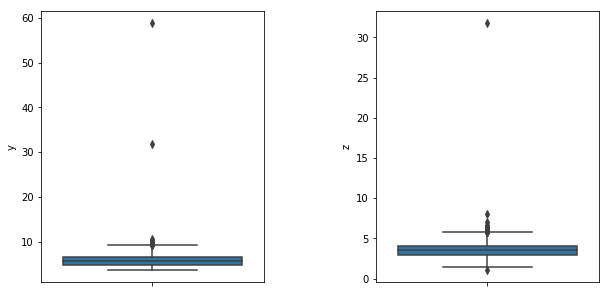

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we now that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.

In [28]:
diamonds.loc[diamonds.z > 10] 

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

In [29]:
diamonds.loc[48410,'z'] = 0
diamonds['z'] = diamonds.apply(get_z, axis=1)

Let's check if we actually corrected the outlier.

In [59]:
diamonds.loc[48410]

carat           0.51
cut        Very Good
color              E
clarity          VS1
depth           61.8
table           54.7
price           1970
x               5.12
y               5.15
z               3.17
Name: 48410, dtype: object

Now let's validate our new z. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of z

In [54]:
diamonds.loc[[48410]].apply(validate, axis=1)

48410    (Real depth: 61.8. Value to validate: 61.7, True)
dtype: object

Now let's do the same for y. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

In [31]:
diamonds[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for y in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

### FORMULA TO CALCULATE Y ----> Y = (2Z - X*DEPTH) / DEPTH

In [32]:
def get_y(row):
    x = row['x']
    y = row['y']
    z = row['z']
    depth = row['depth'] / 100
    
    return  (2 * z  / depth) - x if y == 0 else y

Table before calculating the y again:

Again, let's change the values for 0, since this will let us only change those 2 values and not the whole column.

In [33]:
diamonds.loc[24067, 'y'] = 0
diamonds.loc[49189, 'y'] = 0
diamonds[diamonds.y == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,0.0,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,0.0,5.12


In [34]:
diamonds['y'] = diamonds.apply(get_y, axis=1)

We will check the rows that had an outlier in y, to check that the values were changed:

In [36]:
diamonds.loc[24067]

carat            2
cut        Premium
color            H
clarity        SI2
depth         58.9
table           57
price        12210
x             8.09
y          19.2784
z             8.06
Name: 24067, dtype: object

In [37]:
diamonds.loc[49189]

carat         0.51
cut          Ideal
color            E
clarity        VS1
depth         61.8
table           55
price         2075
x             5.15
y          11.4196
z             5.12
Name: 49189, dtype: object

In [55]:
diamonds.loc[[49189]].apply(validate, axis=1)

49189    (Real depth: 61.8. Value to validate: 61.8, True)
dtype: object

In [56]:
diamonds.loc[[24067]].apply(validate, axis=1)

24067    (Real depth: 58.9. Value to validate: 58.9, True)
dtype: object

In [57]:
diamonds.loc[49189]

carat         0.51
cut          Ideal
color            E
clarity        VS1
depth         61.8
table           55
price         2075
x             5.15
y          11.4196
z             5.12
Name: 49189, dtype: object

In [58]:
diamonds.loc[24067]

carat            2
cut        Premium
color            H
clarity        SI2
depth         58.9
table           57
price        12210
x             8.09
y          19.2784
z             8.06
Name: 24067, dtype: object

Although our formula was applied correctly, we can clearly see that the values we got for y are outliers, since the max value for y is around 10. Since we could not correctly approximate y (and this can only mean that the values of x, y or depth are wrong), we will drop these 2 rows.

In [71]:
diamonds = diamonds.drop([24067, 49189])

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

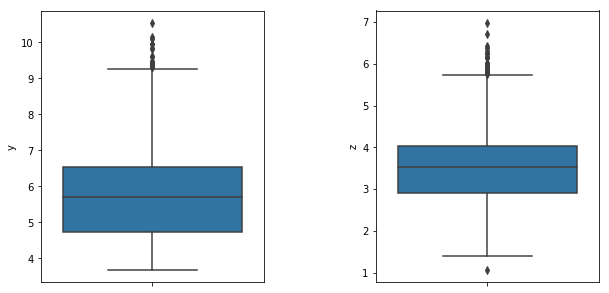

In [72]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [76]:
diamonds[diamonds.z < 2]

,carat,cut,color,clarity,depth,table,price,x,y,z
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
20694,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53
21654,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41


In [77]:
diamonds[diamonds.z < 2].apply(validate, axis=1)

14635    (Real depth: 60.6. Value to validate: 16.1, Fa...
20694    (Real depth: 61.9. Value to validate: 20.5, Fa...
21654    (Real depth: 60.7. Value to validate: 19.4, Fa...
dtype: object

BUENO, HAY MAS OUTLIERS, TENGO QUE LIMPIARLOS PERO POR CUESTION DE TIEMPO VOY A PASAR A LA PARTE DE EDA.